The qubit is represented by a linear superposition:

$ |q> = \alpha |0> + \beta |1> $

of two orhtornormal basis states: 

$ |0> = {\begin{bmatrix}1 \\ 0\end{bmatrix}} $,

$ |1> = {\begin{bmatrix}0 \\ 1\end{bmatrix}} $.

so we can write it:
$ |q> = {\begin{bmatrix}\alpha \\ 0\end{bmatrix}} +  {\begin{bmatrix}0 \\ \beta \end{bmatrix}} =  {\begin{bmatrix} \alpha \\ \beta \end{bmatrix}} $. 

$ \alpha $ and $ \beta $ are the probability amplitudes, and are just a complex numbers, that meets the requirement $|\alpha|^2 + |\beta|^2  = 1$. 

A classical bit can have only two states 0 or 1. But a cubit can exist in any of the states varing the $\alpha$ and $\beta$ parameters constrained. For the quantum computing the beside basis states: `|0>`, `|1>` the superpostion states, `|+>`, `|->`. In these states there is is qual probabilty that makeing the measurement we will get `|0>` or `|1>` state. The other possible states are called *Mixed states*. The qubit states can be visualised on the *Bloch Sphere*.


In [52]:
# Qubit basis states
import numpy as np

q0 = np.array([[1.],
              [0.]])
q1 = np.array([[0.],
              [1.]])

To create a superpostion state we need to use a Hadamard gate, which is a matrix: 

H = $ \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}} $,

In [53]:
hGate = 1./np.sqrt(2) * np.array([[1, 1],
                                     [1, -1]])
hGate

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [54]:
q_plus = np.dot(hGate, q0)
q_plus

array([[0.70710678],
       [0.70710678]])

In [4]:
q_minus = np.dot(hGate, q1)

and going back:

In [5]:
np.dot(hGate, q_plus)

array([[1.],
       [0.]])

In [6]:
np.dot(hGate, q_minus)

array([[0.],
       [1.]])

## Flipping the bit

To change a qubit state we need to use the quantum gates. 

To make a *bit flip* and change the state from `|0>` to `|1>` we use the *Pauli-X gate*:

$ X = {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}} $,

#### Math

$ {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}} {\begin{bmatrix}1 \\ 0\end{bmatrix}} = {\begin{bmatrix}0 \\ 1 \end{bmatrix}}$,


#### Numpy

In [7]:
x_gate = np.array([[0, 1],
                   [1, 0]])

np.dot(x_gate, q0)

array([[0.],
       [1.]])

In [8]:
np.dot(x_gate, q1)

array([[1.],
       [0.]])

#### Quantum 

To perform the bit flip on a qubit we need to build a quantum circut what we can understand as a linear quantum program. We would also need a classcical register for storing the result retrivied from the qubit.

In [31]:
import qiskit
from qiskit import Aer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute
# qiskit.IBMQ.load_accounts()
backend = Aer.get_backend('qasm_simulator')
backend_vec= Aer.get_backend('statevector_simulator')

In [10]:
qr1 = QuantumRegister(1) # The initial state for every qubit is |0> by default
cr1 = ClassicalRegister(1)
qc = QuantumCircuit(qr1, cr1)

qc.x(qr1) # a bit flip

qc.measure(qr1, cr1)




Now we can see how the quantum program is designed:

In [11]:
print(qc)

         ┌───┐┌─┐
q0_0: |0>┤ X ├┤M├
         └───┘└╥┘
 c0_0: 0 ══════╩═
                 


and finally run it on a quantum device or simualtor:

In [12]:
job = execute(qc , backend=backend, shots=100)
st = job.result().get_counts()
print(st)

{'1': 100}


as the result we can see that the state `|1>` was measured 100 hunderd times, and it is the only state that was measured.

## Making bytes

We can combine multiple qubits to store complex state, simmilary as we concatenate bit to create bytes etc.

Using two qubits we can build states like: `|00>`, `|10>`, `|0+>` etc.

To do that we make a tensor product of two qubits:

$ |01> = |0> \otimes |1> 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} \otimes {\begin{bmatrix}0 \\ 1\end{bmatrix}} 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}}  {\begin{bmatrix}0 \\ 1\end{bmatrix}}^{T}
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} {\begin{bmatrix}0 & 1\end{bmatrix}}
= {\begin{bmatrix}0\\ 1 \\ 0 \\ 0\end{bmatrix}} 
$


#### Numeric

In [13]:
# Tensor product (Kronecker prodcut in numpy)
np.kron(q0, q1)

array([[0.],
       [1.],
       [0.],
       [0.]])

#### Quantum

In [45]:
qr1 = QuantumRegister(2) # |00>
cr1 = ClassicalRegister(2) # for retreiving measurements from qubits
qc2 = QuantumCircuit(qr1, cr1)
qc2.x(qr1[0]) # bit filp on a first qubit counting from right to left (little endian)
qc2.measure(qr1, cr1)
print(qc)


                  ┌───┐┌─┐
q16_0: |0>────────┤ X ├┤M├
          ┌───┐┌─┐└───┘└╥┘
q16_1: |0>┤ X ├┤M├──────╫─
          └───┘└╥┘      ║ 
 c13_0: 0 ══════╬═══════╩═
                ║         
 c13_1: 0 ══════╩═════════
                          


In [46]:
result = execute(qc2, backend_vec, shots=100).result()
state = result.get_counts()
vector = result.get_statevector(qc2)

print(state)
print(vector)


{'01': 1}
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


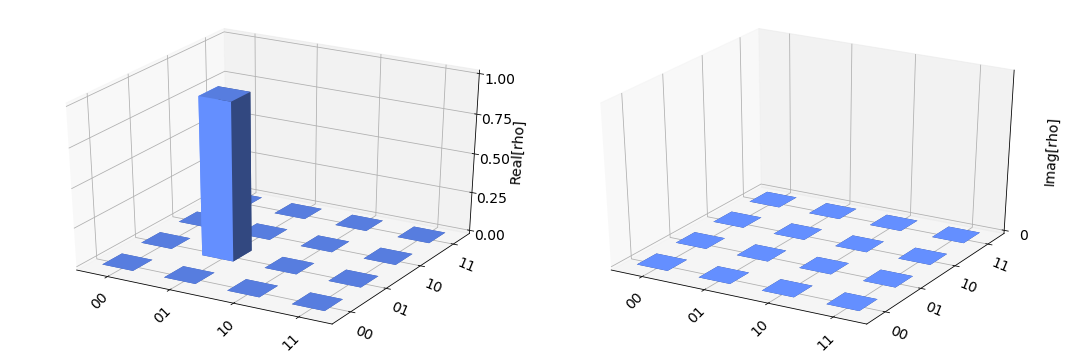

In [42]:
from qiskit.tools.visualization import plot_state_city
plot_state_city(vector)


We can see it more cleary if we create two separate registers.

In [16]:
qr3 = QuantumRegister(1) # |0>
qr4 = QuantumRegister(1) # |0>
cr3 = ClassicalRegister(2) # for retreiving measurements from qubits
qc2 = QuantumCircuit(qr3, qr4, cr3)
qc2.x(qr3) # bit filp on a first qubit counting from right to left (little endian)
qc2.measure(qr3[0], cr3[0])
qc2.measure(qr4[0], cr3[1])
print(qc2)


            ┌───┐┌─┐
q2_0: |0>───┤ X ├┤M├
         ┌─┐└───┘└╥┘
q3_0: |0>┤M├──────╫─
         └╥┘      ║ 
 c2_0: 0 ═╬═══════╩═
          ║         
 c2_1: 0 ═╩═════════
                    


In [17]:
job = execute(qc2 , backend=backend, shots=100)
st = job.result().get_counts()
print(st)

{'01': 100}


Bit flip on the all qubits in the circuit

In [23]:
q0 = QuantumRegister(1)
q1 = QuantumRegister(1)
c0 = ClassicalRegister(1)
c1 = ClassicalRegister(1)

qc = QuantumCircuit(q0, q1, c0, c1)
qc.x(q1)
qc.measure(q0, c0)
qc.measure(q1, c1)
print(qc)

                  ┌─┐
q14_0: |0>────────┤M├
          ┌───┐┌─┐└╥┘
q15_0: |0>┤ X ├┤M├─╫─
          └───┘└╥┘ ║ 
 c11_0: 0 ══════╬══╩═
                ║    
 c12_0: 0 ══════╩════
                     


In [24]:
q0 = QuantumRegister(2)
c0 = ClassicalRegister(2)

qc = QuantumCircuit(q0, c0)
qc.x(q0)
qc.measure(q0, c0)
print(qc)

                  ┌───┐┌─┐
q16_0: |0>────────┤ X ├┤M├
          ┌───┐┌─┐└───┘└╥┘
q16_1: |0>┤ X ├┤M├──────╫─
          └───┘└╥┘      ║ 
 c13_0: 0 ══════╬═══════╩═
                ║         
 c13_1: 0 ══════╩═════════
                          


In [25]:
job = execute(qc , backend=backend, shots=100)
st = job.result().get_counts()
print(st)

{'11': 100}


In [28]:
backend_sim = Aer.get_backend('statevector_simulator')
result = execute(qc, backend_sim).result()
state = result.get_statevector(qc)
print(state)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


As we can see, when we create register containg more qubits, then we can act with a gate on all the qubits in the register at once. Of course we can still precisely point the desidred qubit using index operator `[]` eg. `q0[1]`.

{\displaystyle {\begin{aligned}\mathbf {u} \otimes \mathbf {v} =\mathbf {u} \mathbf {v} ^{\top }={\begin{bmatrix}u_{1}\\u_{2}\\u_{3}\\u_{4}\end{bmatrix}}{\begin{bmatrix}v_{1}&v_{2}&v_{3}\end{bmatrix}}={\begin{bmatrix}u_{1}v_{1}&u_{1}v_{2}&u_{1}v_{3}\\u_{2}v_{1}&u_{2}v_{2}&u_{2}v_{3}\\u_{3}v_{1}&u_{3}v_{2}&u_{3}v_{3}\\u_{4}v_{1}&u_{4}v_{2}&u_{4}v_{3}\end{bmatrix}}.\end{aligned}}}[

In [ ]:
np.outer(q0, q1)

now we have the representation of |01>.
As we can se we need only two qubits to represent four states:
|00>
|01>
|10>
|11>
|+0>
....

As we have seen before to reprerepresent every of these state using normal bits we need four of them:

## TODO

  - [ ] rename qubits to q0 and bits to c, circuit to circ.

### Refs
0. https://qiskit.org/documentation/
1. https://en.wikipedia.org/wiki/Quantum_logic_gate
2. https://jarrodmcclean.com/basic-quantum-circuit-simulation-in-python/
3. https://en.wikipedia.org/wiki/Hadamard_transform#Quantum_computing_applications
4. https://en.wikipedia.org/wiki/Qubit